## FNED and FPED Implementation

In [1]:
import pandas as pd
import numpy as np
import math

#### Read Original Data

In [3]:
data_dir = "occ"
df = pd.read_csv("occ-age/prepared/" + data_dir + ".csv")
df["label"] = df["0"]
df = df.iloc[:,2:]
df

,mutant,template,original,occupation,label
0,"b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker ( Kristofferson) battl...",attendant,0
1,"b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker ( Kristofferson) battl...",cashier,0
2,"b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker ( Kristofferson) battl...",teacher,0
3,"b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker ( Kristofferson) battl...",nurse,0
4,"b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker ( Kristofferson) battl...",assistant,0
...,...,...,...,...,...
704596,"b ' I watched "" Fuckland "" a long time ago. I ...","b ' I watched "" Fuckland "" a long time ago. I ...","b ' I watched "" Fuckland "" a long time ago. I ...",nutritionist,0
704597,"b ' I watched "" Fuckland "" a long time ago. I ...","b ' I watched "" Fuckland "" a long time ago. I ...","b ' I watched "" Fuckland "" a long time ago. I ...",photographer,0
704598,"b ' I watched "" Fuckland "" a long time ago. I ...","b ' I watched "" Fuckland "" a long time ago. I ...","b ' I watched "" Fuckland "" a long time ago. I ...",police officer,0
704599,"b ' I watched "" Fuckland "" a long time ago. I ...","b ' I watched "" Fuckland "" a long time ago. I ...","b ' I watched "" Fuckland "" a long time ago. I ...",singer,0


#### Read Prediction Result from the Model

Make sure you set variable `ouput_dir` with the same `output_dir` in the fine-tuning parameter

In [4]:
def read_txt(fpath):
    pred = []
    file = open(fpath)
    lines = file.readlines()
    for l in lines :
        pred.append(int(l))
    file.close()
    
    return pred

In [8]:
output_dir = "occupation"

result_dir = "../result/" + output_dir + "/"

path = result_dir + "results_data.txt"

pred = read_txt(path)

print(len(pred))

704601


In [9]:
df["prediction"] = pred
# df["label"] = df[0]

In [10]:
df.head()

,mutant,template,original,occupation,label,prediction
0,"b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker ( Kristofferson) battl...",attendant,0,0
1,"b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker ( Kristofferson) battl...",cashier,0,0
2,"b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker ( Kristofferson) battl...",teacher,0,0
3,"b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker ( Kristofferson) battl...",nurse,0,0
4,"b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker (Kristofferson) battle...","b "" THE PLOT: A trucker ( Kristofferson) battl...",assistant,0,0


#### Group by Occupation

In this case, we group by `occupation`.

In [12]:
identifier = "occupation"
dc = df.groupby(identifier)

dc.count()

,mutant,template,original,label,prediction
occupation,,,,,
CEO,8919,8919,8919,8919,8919
accountant,8919,8919,8919,8919,8919
air traffic controller,8919,8919,8919,8919,8919
analyst,8919,8919,8919,8919,8919
architect,8919,8919,8919,8919,8919
...,...,...,...,...,...
therapist,8919,8919,8919,8919,8919
undertaker,8919,8919,8919,8919,8919
veterinarian,8919,8919,8919,8919,8919


In [13]:
print(len(dc))

identifiers = []
for k, v in dict(iter(dc)).items() :
    identifiers.append(k)

79


#### Calculate Global Performance

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = df["label"]
y_pred = df["prediction"]
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92    335750
           1       0.92      0.94      0.93    368851

    accuracy                           0.92    704601
   macro avg       0.92      0.92      0.92    704601
weighted avg       0.92      0.92      0.92    704601

[[304117  31633]
 [ 23833 345018]]


#### Calculate Performance for each Group

In [15]:
for k, v in dict(iter(dc)).items() :
    y_test = v["label"]
    y_pred = v["prediction"]
#     print(classification_report(y_test, y_pred))
#     cm = confusion_matrix(y_test, y_pred)
#     print(cm)

#### Implementation

Fundamental Thery about FPR and FNR: 
https://medium.com/datadriveninvestor/confusion-matric-tpr-fpr-fnr-tnr-precision-recall-f1-score-73efa162a25f


Theory on FPED and FNED:
https://research.google/pubs/pub46743/ 

In [16]:
# calculate false positive rate from given consufsion matrix
def calculate_fpr(cm) :
    negative = np.sum(cm[0])
    fp = cm[0][1]
    fpr = fp / negative
    return fpr

# calculate false positive rate from given consufsion matrix
def calculate_fnr(cm) :
    negative = np.sum(cm[0])
    fn = cm[1][0]
    fnr = fn / negative
    return fnr

print(calculate_fpr(cm))
print(calculate_fnr(cm))

0.09421593447505584
0.0709843633655994


#### Calculate Global FPR and FNR

In [17]:
y_test = df["label"]
y_pred = df["prediction"]
cm = confusion_matrix(y_test, y_pred)
global_fpr = calculate_fpr(cm)
global_fnr = calculate_fnr(cm)
print("global fpr: ", global_fpr)
print("global fnr: ", global_fnr)

global fpr:  0.09421593447505584
global fnr:  0.0709843633655994


#### Calculate FPR and FNR for each Identifier

In [18]:
fprs = []
fnrs = []

for k, v in dict(iter(dc)).items() :
    y_test = v["label"]
    y_pred = v["prediction"]
    cm = confusion_matrix(y_test, y_pred)
    fpr = calculate_fpr(cm)
    fnr = calculate_fnr(cm)
    fprs.append(round(fpr, 5))
    fnrs.append(round(fnr, 5))

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline


dfprs = pd.DataFrame(data={"identifier": identifiers, "FPR":fprs})
dfprs = dfprs.groupby("identifier").sum().sort_values(by=["FPR"],ascending=False)

dfprs.head()

,FPR
identifier,
undertaker,0.09553
photographer,0.09553
judge,0.09553
baker,0.09553
guard,0.09529


Text(0, 0.5, 'FPR')

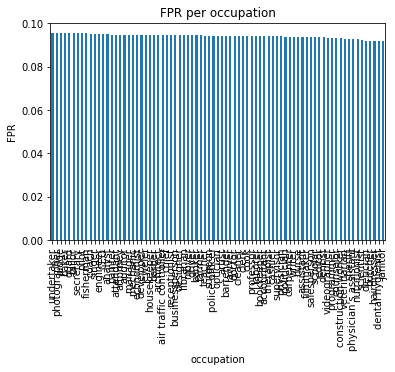

In [20]:
my_plot = dfprs.plot(kind='bar', legend=None, title="FPR per " + identifier)
my_plot.set_xlabel(identifier)
my_plot.set_ylabel("FPR")

In [21]:
dfnrs = pd.DataFrame(data={"identifier": identifiers, "FNR":fnrs})
dfnrs = dfnrs.groupby("identifier").sum().sort_values(by=["FNR"],ascending=False)

dfnrs.head()

,FNR
identifier,
butcher,0.07365
scientist,0.07294
janitor,0.07271
programmer,0.07247
dental hygienist,0.07224


Text(0, 0.5, 'FNR')

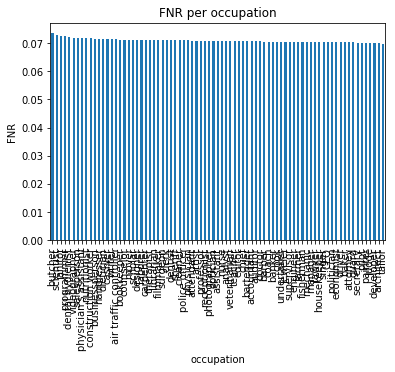

In [22]:
my_plot = dfnrs.plot(kind='bar', legend=None, title="FNR per " + identifier)
my_plot.set_xlabel(identifier)
my_plot.set_ylabel("FNR")

#### Calculate FNED and FPED

In [23]:
fped = 0
fned = 0

for _fpr, _fnr in zip(fprs, fnrs) :
    fped += abs(global_fpr - fpr)
    fned += abs(global_fnr - fnr)

print()
print("FPED: ", fped)
print("FNED: ", fned)


FPED:  0.026352941176470288
FNED:  0.043058823529411636
